# Connecting google drive for files with datasets

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Imports

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_selection import RFE
from scipy.io import arff
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict as dd
from copy import deepcopy
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Folder destinations

In [ ]:
folder_dest = 'drive/MyDrive/Colab Notebooks/Projekt/'
gesture_dest = folder_dest + 'Gesture/'

# Getting gesture dataset from files


In [ ]:
# main train and test sets for gestures
# switched train with test because originaly in train was less data

gesture_test = arff.loadarff(gesture_dest+'UWaveGestureLibrary_TRAIN.arff')
gesture_test_pd = pd.DataFrame(gesture_test[0])
gesture_test_data = gesture_test_pd['relationalAtt'].to_numpy()
gesture_test_labels = gesture_test_pd['classAttribute'].to_numpy()
gesture_test_labels = np.array([np.float64(i) for i in gesture_test_labels])

gesture_train = arff.loadarff(gesture_dest+'UWaveGestureLibrary_TEST.arff')
gesture_train_pd = pd.DataFrame(gesture_train[0])
gesture_train_data = gesture_train_pd['relationalAtt'].to_numpy()
gesture_train_labels = gesture_train_pd['classAttribute'].to_numpy()
gesture_train_labels = np.array([np.float64(i) for i in gesture_train_labels])

# # train and test sets divided for dimensions/channels
# gesture_test_d1 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension1_TEST.arff')
# gesture_train_d1 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension1_TRAIN.arff')
# gesture_test_d2 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension2_TEST.arff')
# gesture_train_d2 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension2_TRAIN.arff')
# gesture_test_d3 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension3_TEST.arff')
# gesture_train_d3 = arff.loadarff(gesture_dest+'UWaveGestureLibraryDimension3_TRAIN.arff')




#Dividing gesture dataset for training and validation sets

In [ ]:
gesture_train_data, gesture_val_data, gesture_train_labels, gesture_val_labels = train_test_split(gesture_train_data,
                                                                                                  gesture_train_labels,
                                                                                                  stratify=gesture_train_labels,
                                                                                                  test_size=0.25, random_state=39)

print(f"train data shape: {gesture_train_data.shape}")
print(f"validation data shape: {gesture_val_data.shape}")
print(f"test data shape: {gesture_test_data.shape}")

train data shape: (240,)
validation data shape: (80,)
test data shape: (120,)


# Selecting single dimensions

In [ ]:

gesture_test_x = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[0]))  for i in gesture_test_data])
gesture_test_y = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[1]))  for i in gesture_test_data])
gesture_test_z = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[2]))  for i in gesture_test_data])

gesture_val_x = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[0]))  for i in gesture_val_data])
gesture_val_y = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[1]))  for i in gesture_val_data])
gesture_val_z = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[2]))  for i in gesture_val_data])

gesture_train_x = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[0]))  for i in gesture_train_data])
gesture_train_y = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[1]))  for i in gesture_train_data])
gesture_train_z = np.array([list(map(lambda x: np.array(x, dtype=np.float64), i[2]))  for i in gesture_train_data])

# Checking for possible null values in datasets

In [ ]:
def check_nulls(dataset):
  return np.isnan(dataset).any()

print("Are nulls in gesture:", any([check_nulls(gesture_test_x), check_nulls(gesture_test_y), check_nulls(gesture_test_z), \
      check_nulls(gesture_train_x), check_nulls(gesture_train_y), check_nulls(gesture_train_z), \
      check_nulls(gesture_val_x), check_nulls(gesture_val_y), check_nulls(gesture_val_z), \
      check_nulls(gesture_test_labels), check_nulls(gesture_train_labels), check_nulls(gesture_val_labels)]))


Are nulls in gesture: False


# Creating dictionaries for data visualization and reshaping gesture data

In [ ]:
gesture_train_dict = dd(list)
gesture_test_dict = dd(list)
gesture_val_dict = dd(list)

new_gesture_train_data = []
new_gesture_test_data = []
new_gesture_val_data = []

i=0
for label in gesture_train_labels:
  gesture_train_dict[(label, "x")].append(gesture_train_x[i])
  gesture_train_dict[(label, "y")].append(gesture_train_y[i])
  gesture_train_dict[(label, "z")].append(gesture_train_z[i])
  new_gesture_train_data.append(np.array([gesture_train_x[i], gesture_train_y[i], gesture_train_z[i]], dtype=np.float64))
  i+=1

i=0
for label in gesture_val_labels:
  gesture_val_dict[(label, "x")].append(gesture_val_x[i])
  gesture_val_dict[(label, "y")].append(gesture_val_y[i])
  gesture_val_dict[(label, "z")].append(gesture_val_z[i])
  new_gesture_val_data.append(np.array([gesture_val_x[i], gesture_val_y[i], gesture_val_z[i]], dtype=np.float64))
  i+=1

i=0
for label in gesture_test_labels:
  gesture_test_dict[(label, "x")].append(gesture_test_x[i])
  gesture_test_dict[(label, "y")].append(gesture_test_y[i])
  gesture_test_dict[(label, "z")].append(gesture_test_z[i])
  new_gesture_test_data.append(np.array([gesture_test_x[i], gesture_test_y[i], gesture_test_z[i]], dtype=np.float64))
  i+=1

gesture_train_data = np.array(new_gesture_train_data)
gesture_test_data = np.array(new_gesture_test_data)
gesture_val_data = np.array(new_gesture_val_data)

In [ ]:

print(f"gesture train data shape: {gesture_train_data.shape}")
print(f"gesture validation data shape: {gesture_val_data.shape}")
print(f"gesture test data shape: {gesture_test_data.shape}")

gesture train data shape: (240, 3, 315)
gesture validation data shape: (80, 3, 315)
gesture test data shape: (120, 3, 315)


# Plotting gesture dataset

In [ ]:

class Plotter:
    def __init__(self, dictionary: dict[tuple[np.float64, str], list[np.array]]):
        self.dictionary = dictionary

    def get_stats(self, time_series):
        new_time_series = deepcopy(time_series)
        stats = {"mean": np.mean, "std": np.std, "max": np.max, "min": np.min}
        transposed = np.array(new_time_series).T
        return {stat: np.array([func(ts) for ts in transposed]) for stat, func in stats.items()}

    def plot_histogram(self):
        new_dict = {key[0]: len(value) for key, value in self.dictionary.items()}
        plt.bar(list(new_dict.keys()), list(new_dict.values()))
        plt.xlabel("Class")
        plt.ylabel("Number of time series")
        plt.title("Number of time series per class")
        plt.show()

    def plot_time_series(self, time_series, label="unknown", dimension="unknown", ax=None):
        if ax is None:
            ax = plt.gca()

        for ts in time_series:
            ax.plot(ts)
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")
        ax.set_title(f"All time series for class {label}\nand dimension {dimension}")

    def plot_stats(self, time_series, label="unknown", dimension="unknown", ax=None):
        stats = self.get_stats(time_series)
        upper_bound = stats["mean"] + 3 * stats["std"]
        lower_bound = stats["mean"] - 3 * stats["std"]

        if ax is None:
            ax = plt.gca()

        ax.plot(stats["mean"], label="mean")
        ax.plot(stats["max"], label="max")
        ax.plot(stats["min"], label="min")
        ax.plot(upper_bound, label="+3 std")
        ax.plot(lower_bound, label="-3 std")

        ax.set_xlabel("Time")
        ax.set_ylabel("Value")
        ax.set_title(f"Time series statistics for dimension {dimension}\n and class {label}")
        ax.fill_between(range(len(stats["mean"])), upper_bound, lower_bound, color='blue', alpha=0.2, label="±3 std")
        ax.legend()

    def plot_all_stats_from_dict(self):
        for dimension_idx in "xyz":
            fig, axs = plt.subplots(3, 3, figsize=(15, 15))
            axs = axs.flatten()

            idx = 0
            for class_idx in range(1,9):
                key = (np.float64(class_idx), dimension_idx)
                if key in self.dictionary:
                    self.plot_stats(self.dictionary[key], label=np.float64(class_idx), dimension=dimension_idx, ax=axs[idx])
                    idx += 1

            for i in range(idx, 9):
                axs[i].axis('off')

            plt.subplots_adjust(wspace=0.3, hspace=0.3)
            plt.tight_layout()
            plt.show()

    def plot_all_series_from_dict(self):
        for dimension_idx in "xyz":
            fig, axs = plt.subplots(3, 3, figsize=(15, 15))
            axs = axs.flatten()

            idx = 0
            for class_idx in range(1,9):
                key = (np.float64(class_idx), dimension_idx)
                if key in self.dictionary:
                    self.plot_time_series(self.dictionary[key], label=np.float64(class_idx), dimension=dimension_idx, ax=axs[idx])
                    idx += 1

            for i in range(idx, 9):
                axs[i].axis('off')

            plt.subplots_adjust(wspace=0.3, hspace=0.3)
            plt.tight_layout()
            plt.show()

    def plot_mean_comparison(self):
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        for i, dimension_idx in enumerate("xyz"):
            for class_idx in range(1, 9):
                key = (np.float64(class_idx), dimension_idx)
                if key in self.dictionary:
                    time_series = self.dictionary[key]
                    mean_values = np.mean(np.array(time_series), axis=0)
                    axs[i].plot(mean_values, label=f"Klasa {class_idx}")

            axs[i].set_title(f"Porównanie średnich dla współrzędnej {dimension_idx}")
            axs[i].set_xlabel("Czas")
            axs[i].set_ylabel("Średnia wartość")
            axs[i].legend()

        plt.tight_layout()
        plt.show()

        plt.tight_layout()
        plt.show()

    def plot_3d_trajectory(self):
        fig = plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

        for class_idx in range(1, 9):
            ax = fig.add_subplot(2, 4, class_idx, projection='3d')  # 4x2 grid of subplots

            x_key = (np.float64(class_idx), 'x')
            y_key = (np.float64(class_idx), 'y')
            z_key = (np.float64(class_idx), 'z')

            if x_key in self.dictionary and y_key in self.dictionary and z_key in self.dictionary:
                x_mean = np.mean(np.array(self.dictionary[x_key]), axis=0)
                y_mean = np.mean(np.array(self.dictionary[y_key]), axis=0)
                z_mean = np.mean(np.array(self.dictionary[z_key]), axis=0)

                ax.plot(x_mean, y_mean, z_mean, label=f"Class {class_idx}", color='b')
                ax.scatter(x_mean[0], y_mean[0], z_mean[0], color='r', label="Start")  # Start point
                ax.scatter(x_mean[-1], y_mean[-1], z_mean[-1], color='g', label="End")  # End point

            ax.set_title(f"Class {class_idx}")
            ax.set_xlabel("X Coordinate")
            ax.set_ylabel("Y Coordinate")
            ax.set_zlabel("Z Coordinate")
            ax.view_init(elev=-90, azim=-90)
            ax.legend()

        plt.tight_layout()
        plt.show()


    def run(self):
        self.plot_histogram()
        self.plot_all_stats_from_dict()
        self.plot_all_series_from_dict()
        self.plot_mean_comparison()
        self.plot_3d_trajectory()



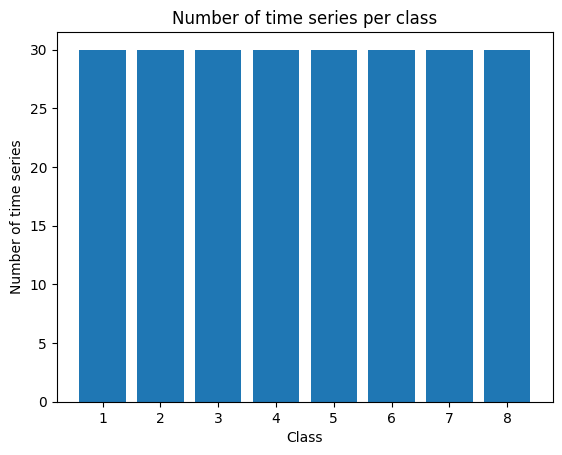

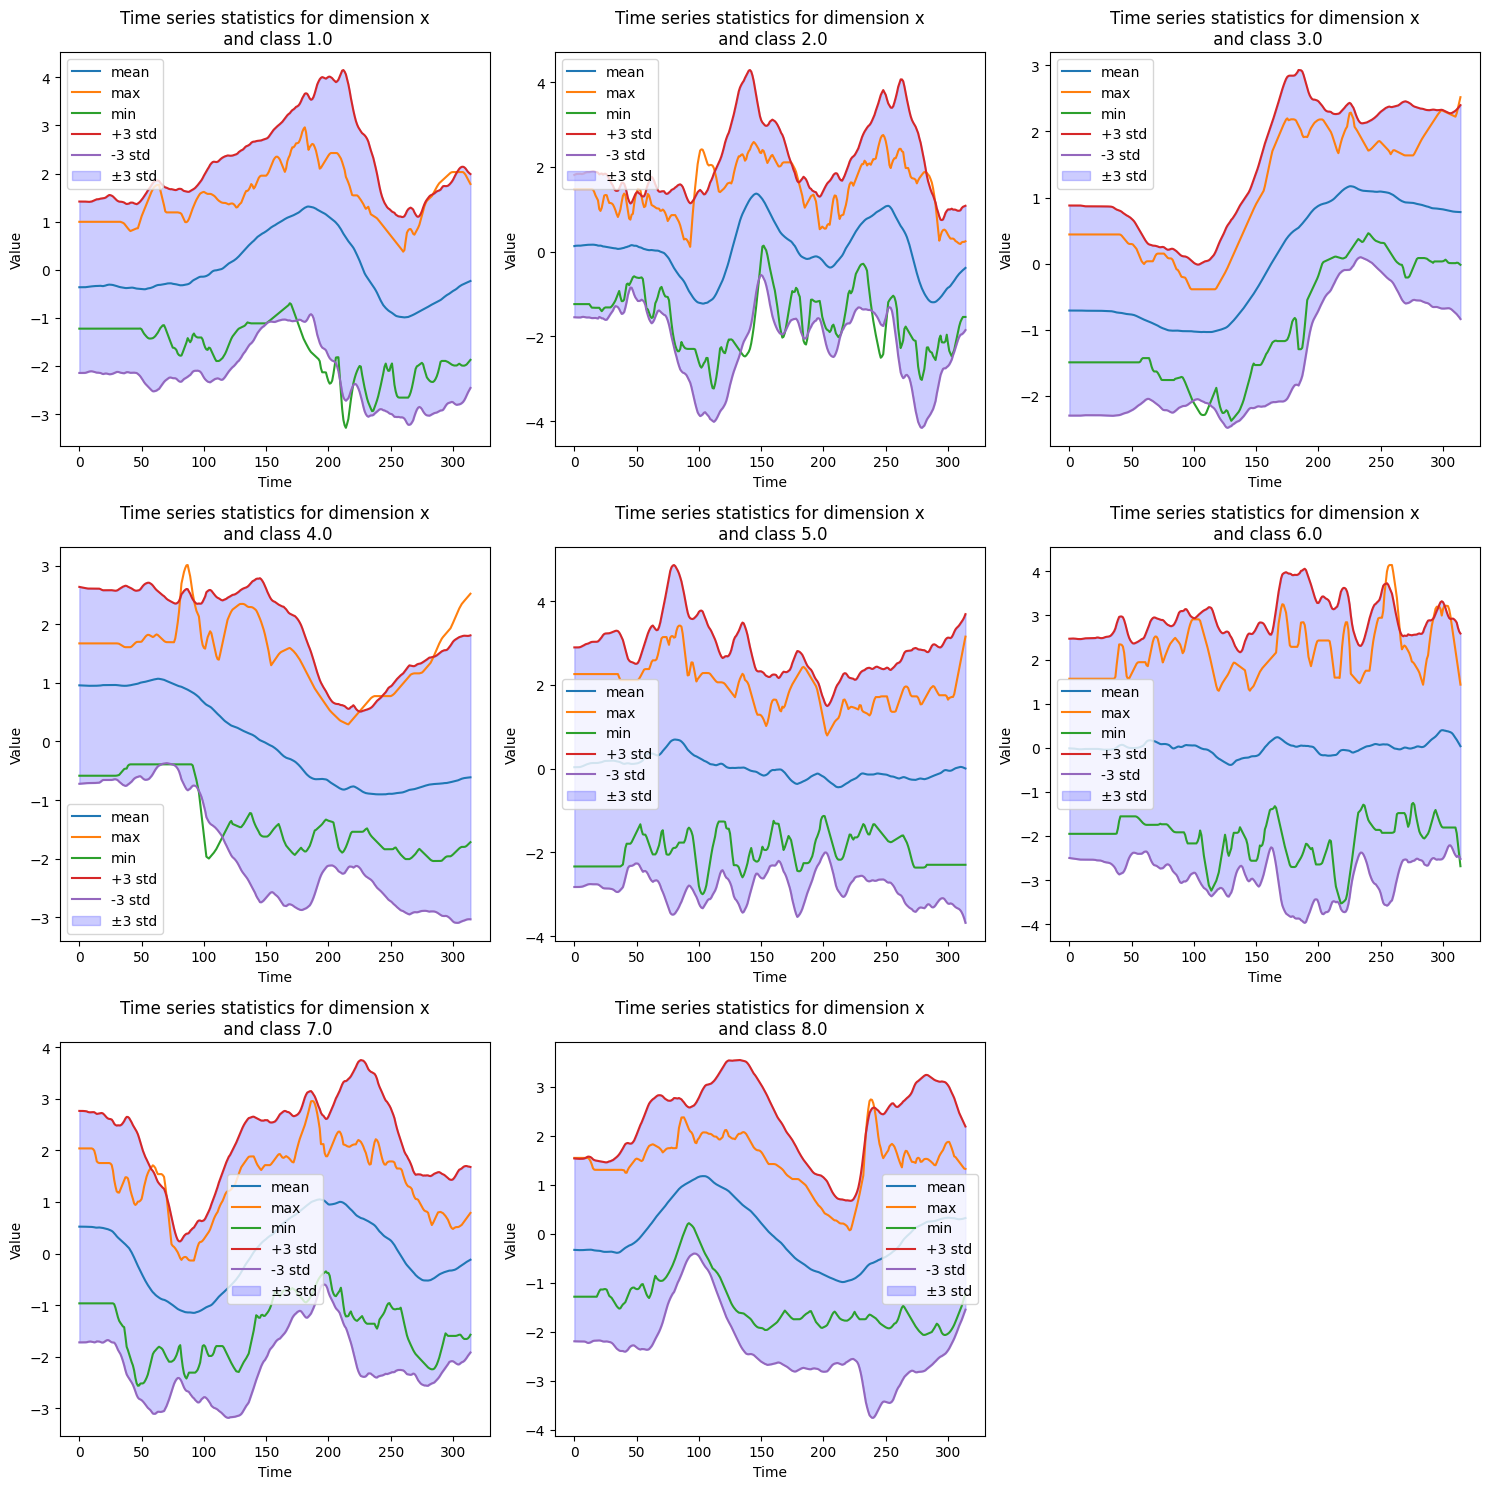

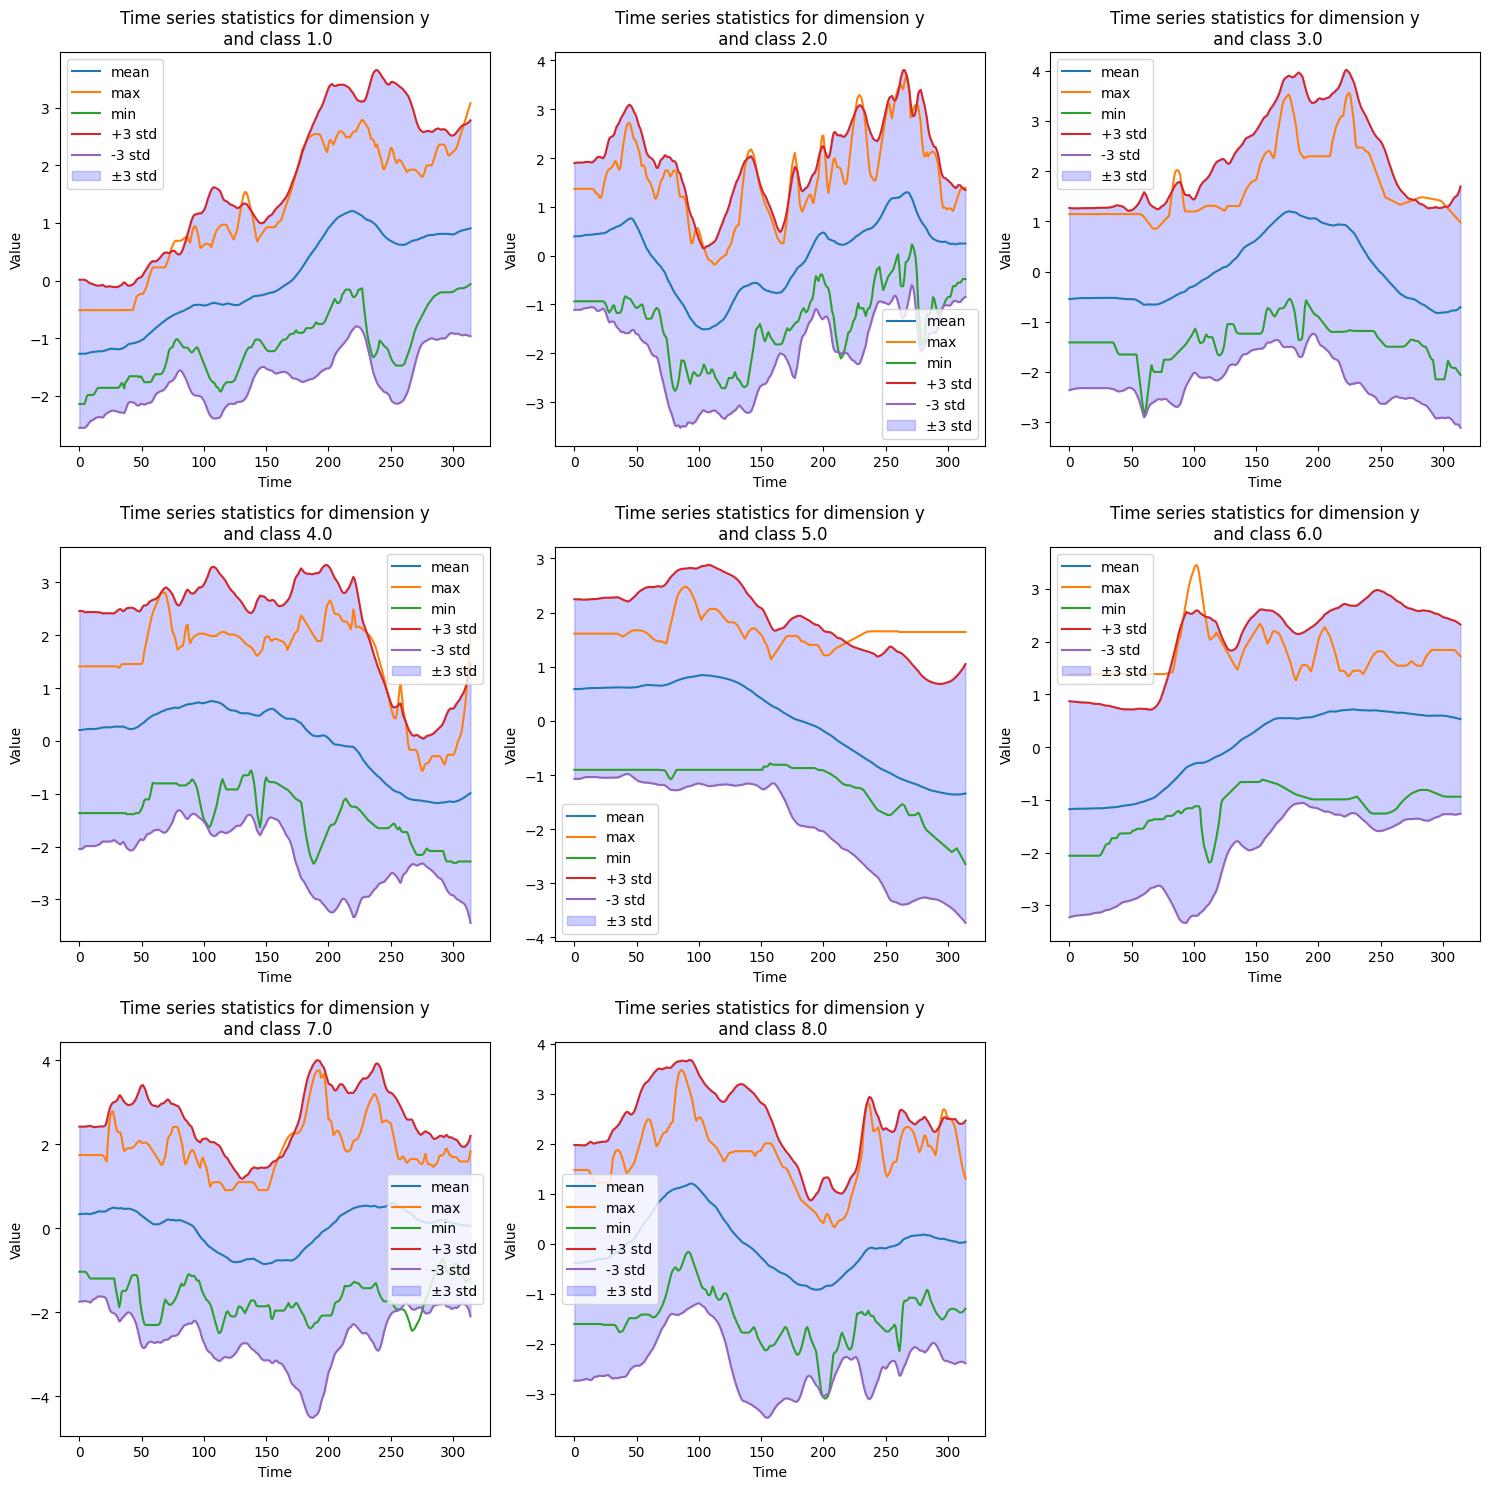

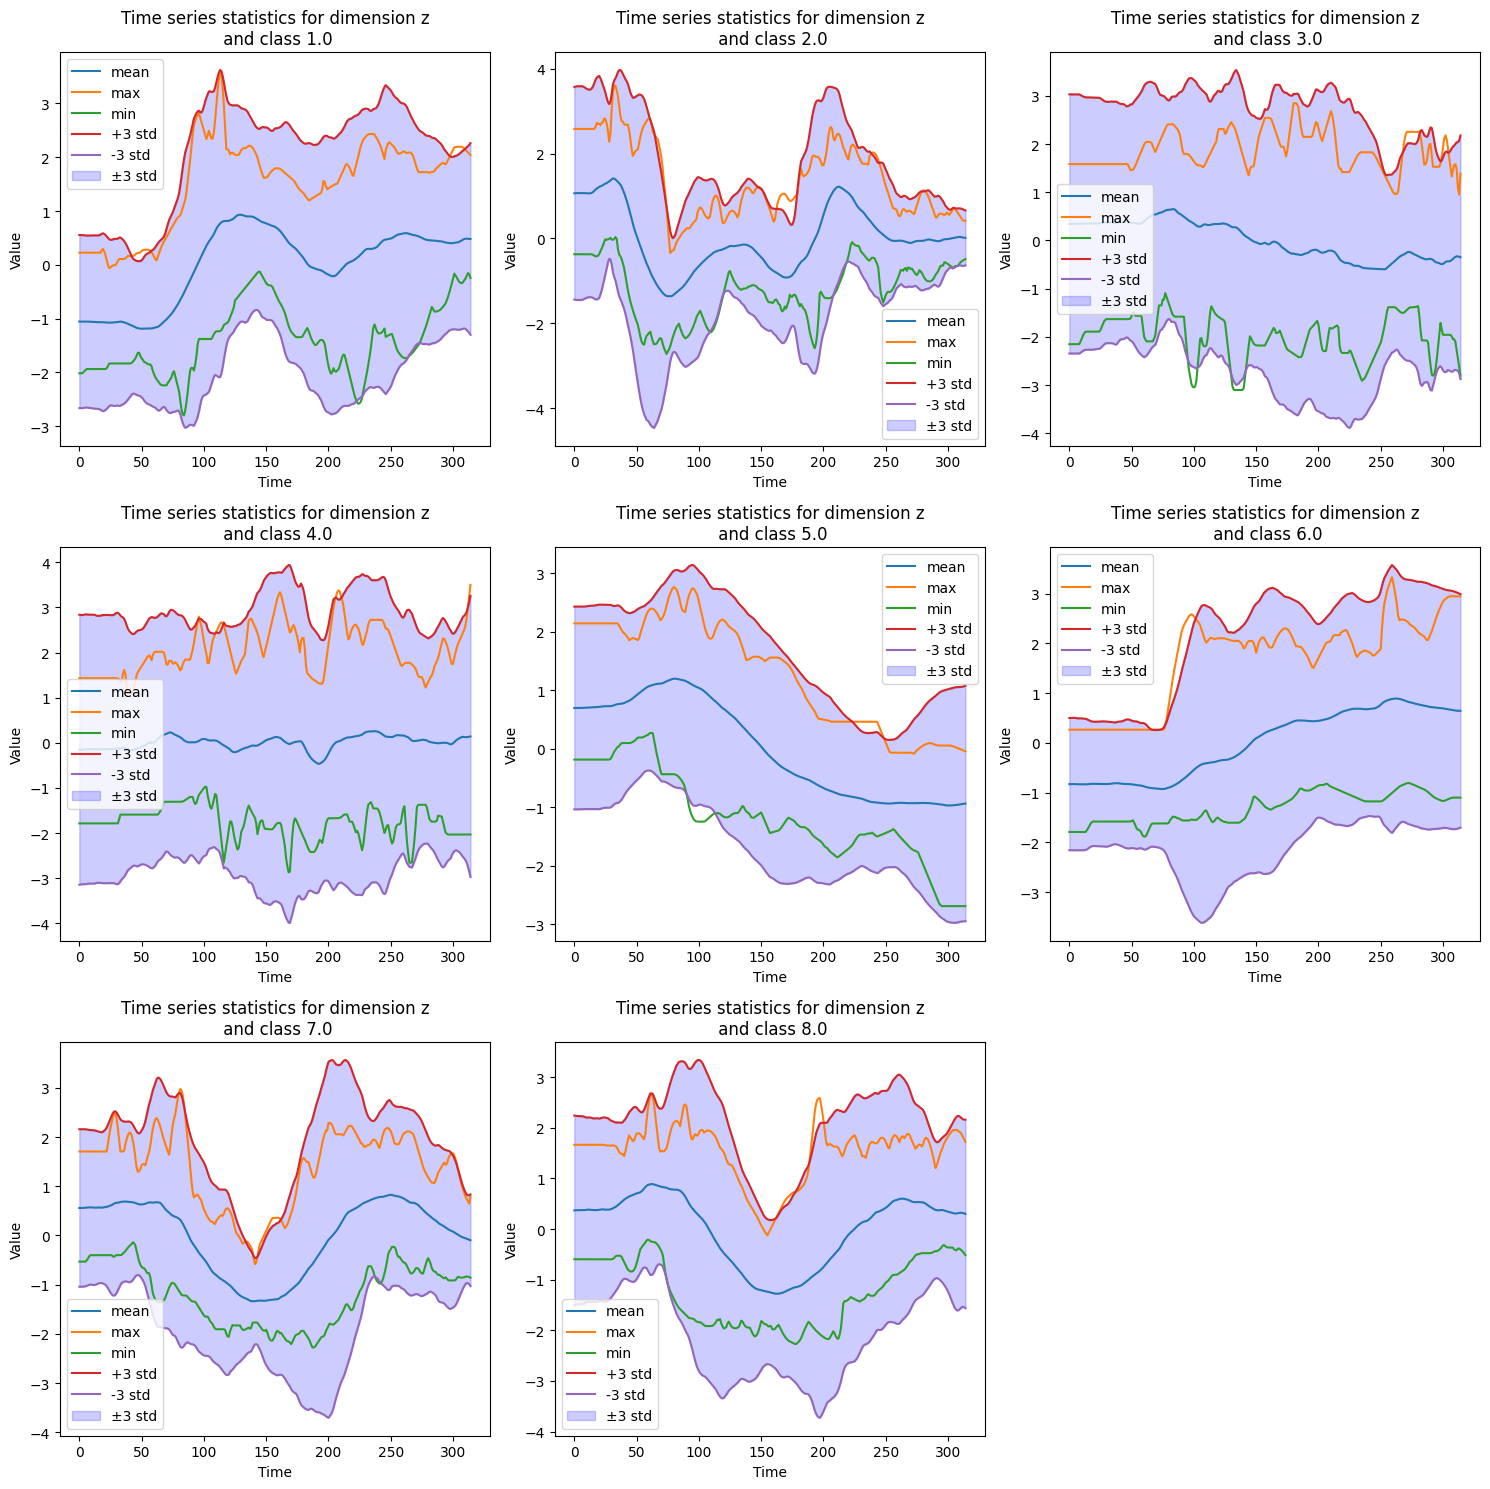

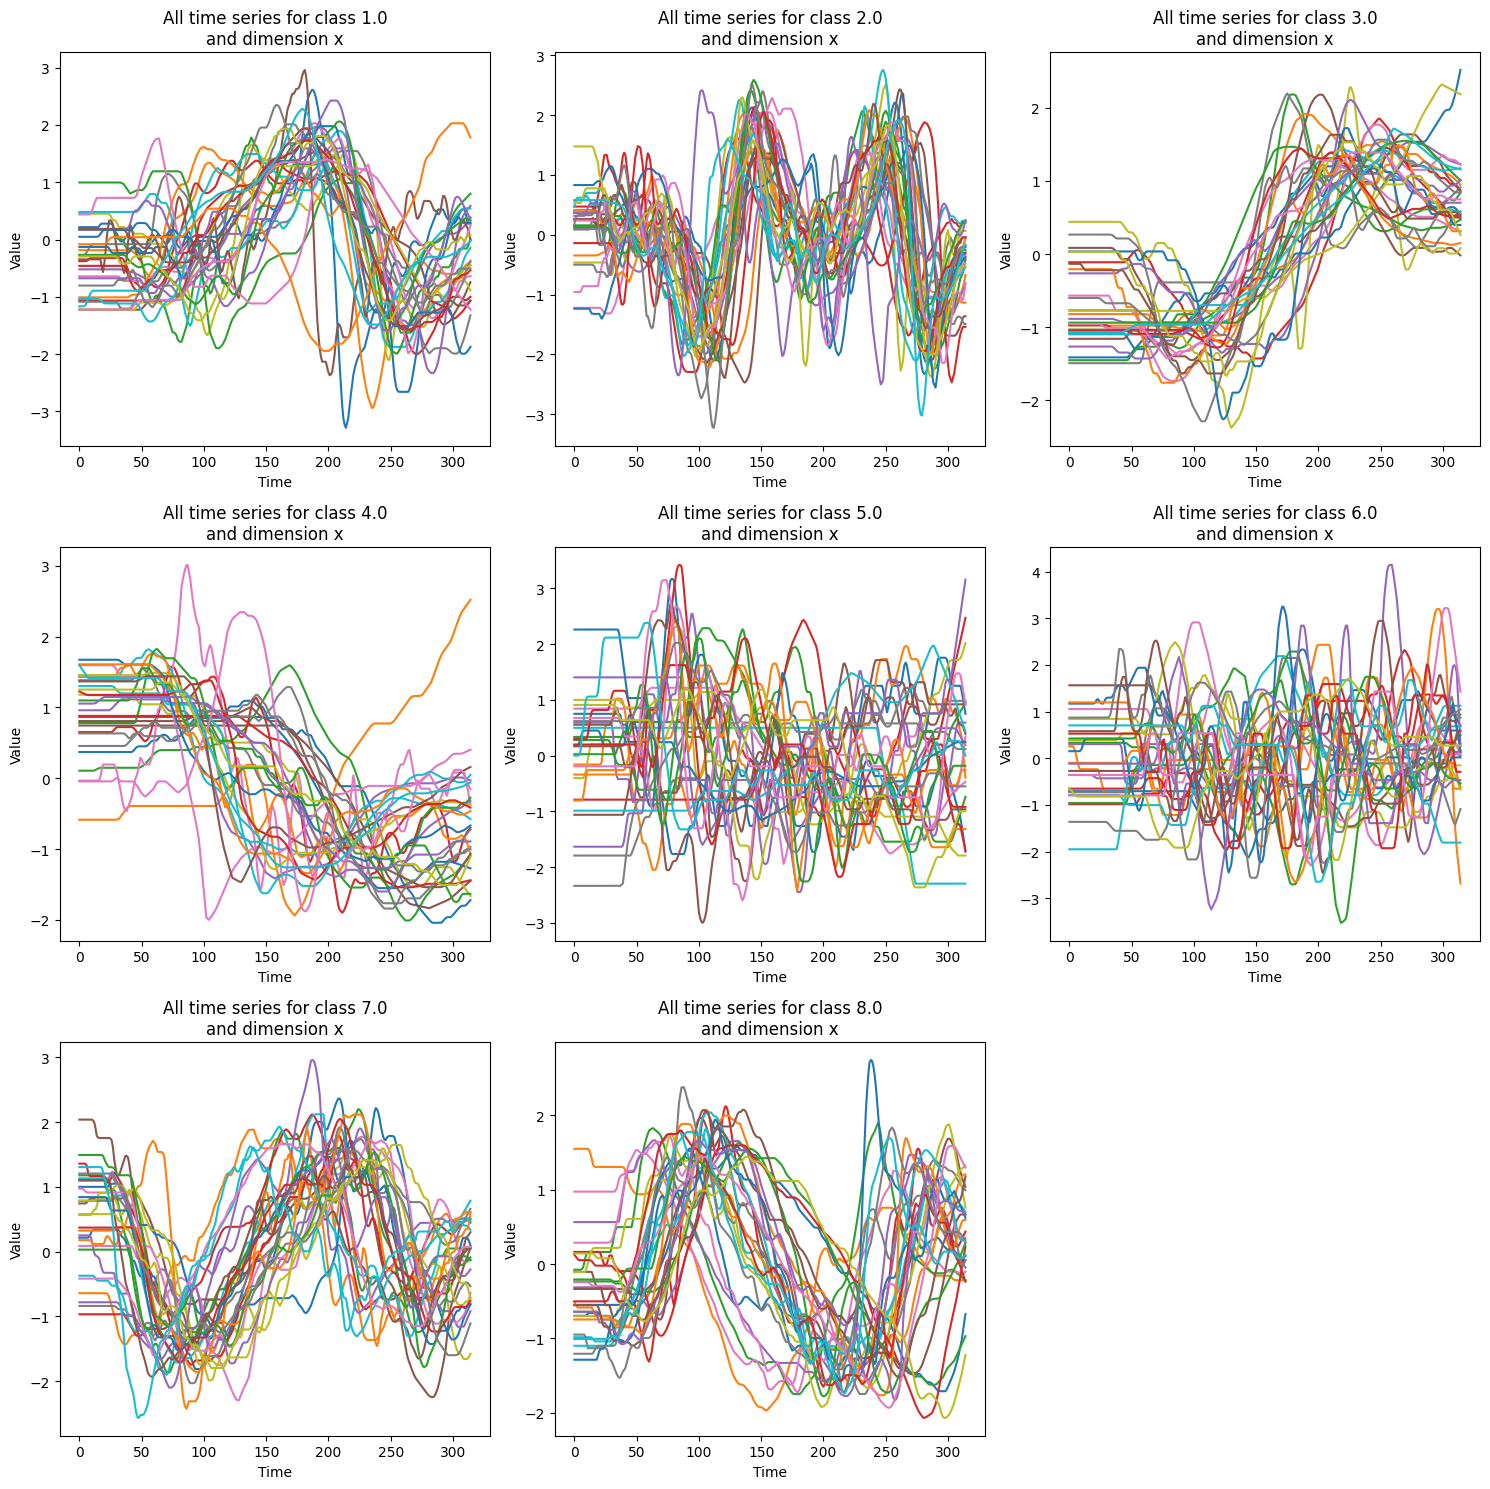

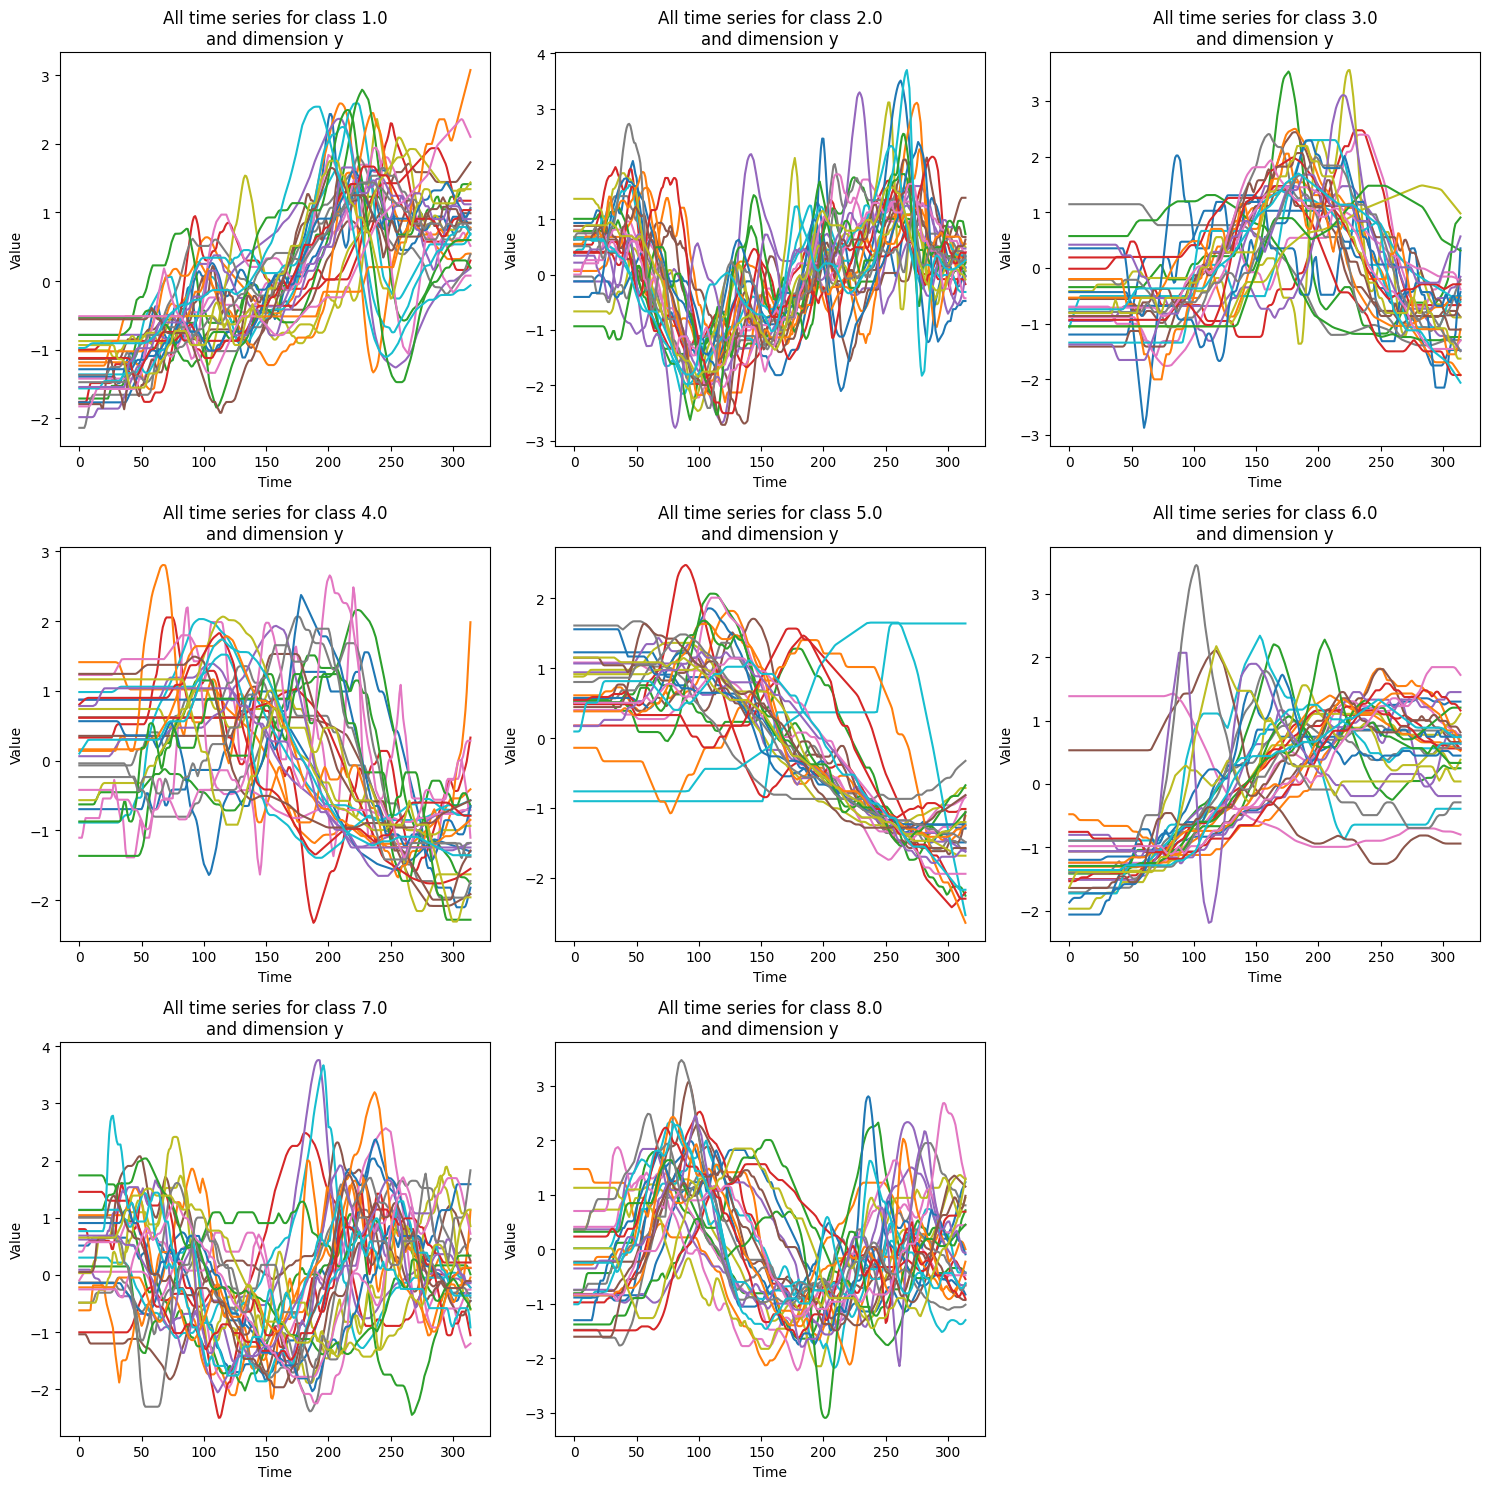

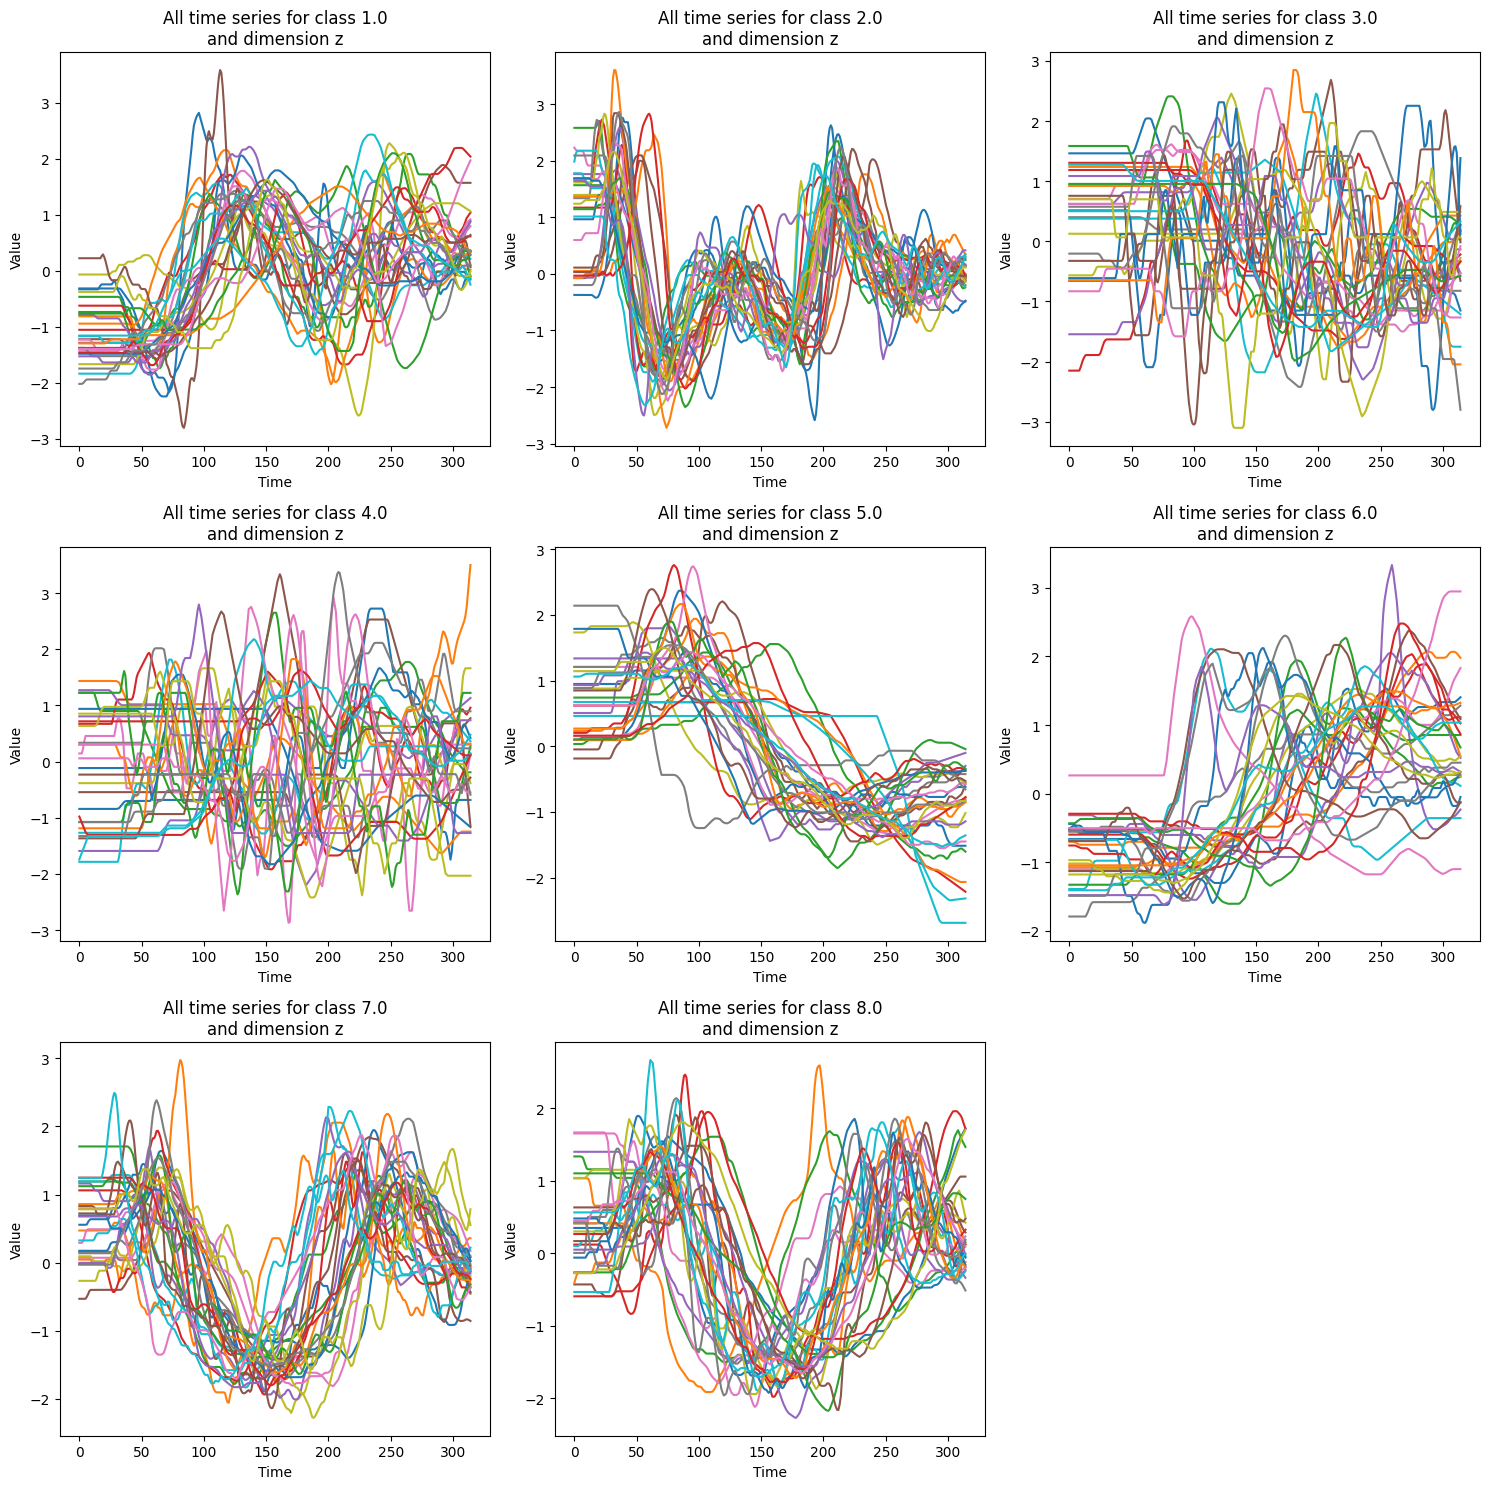

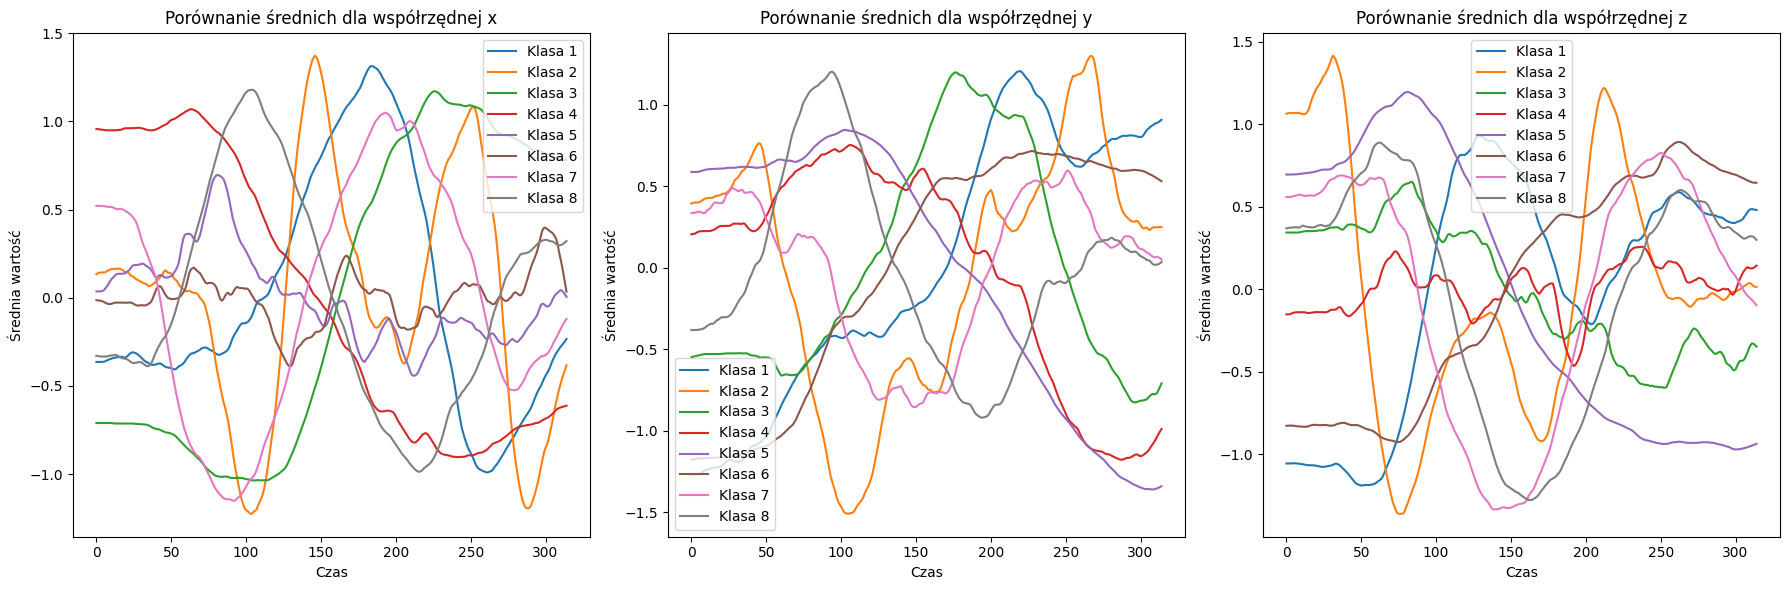

<Figure size 640x480 with 0 Axes>

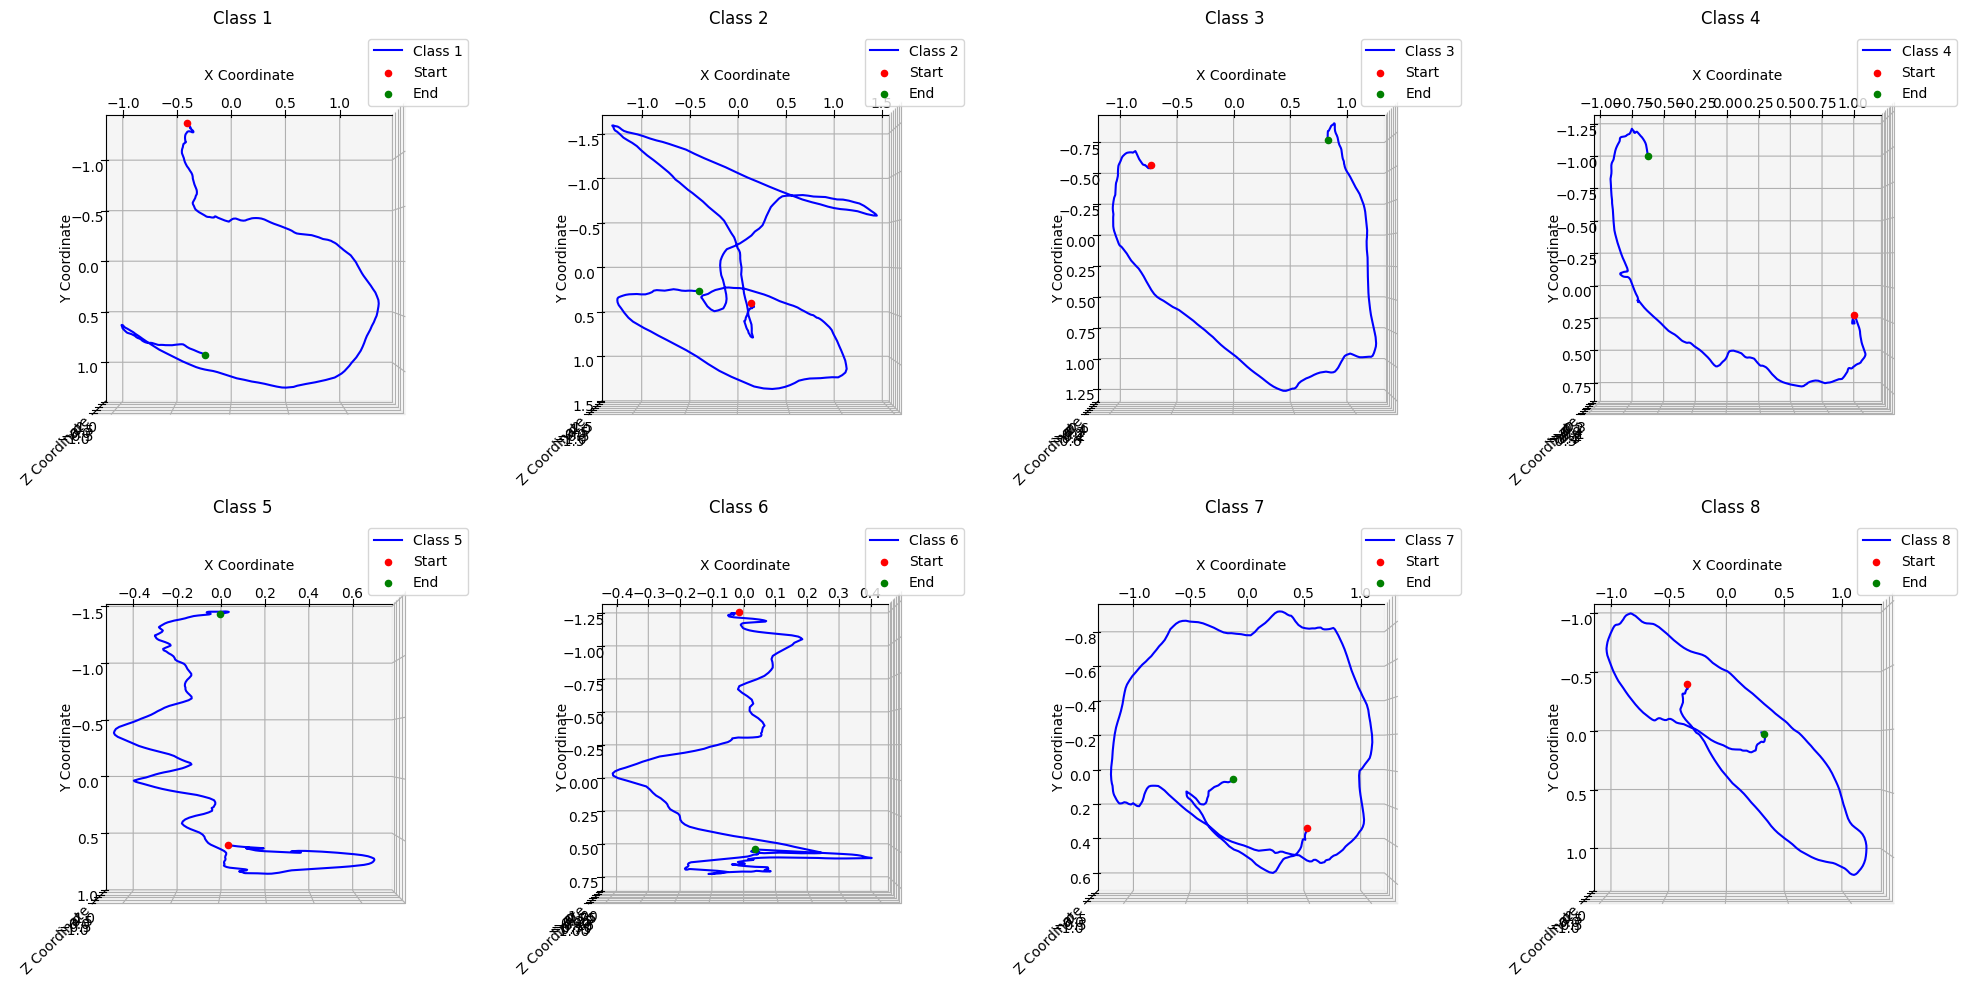

In [ ]:
plotter = Plotter(gesture_train_dict)
plotter.run()

# Sesonal decompose

In [ ]:

def seasonal_decompose_data(data, period=39):
    x_data = data[:, :315]
    y_data = data[:, 315:630]
    z_data = data[:, 630:]

    def decompose_single_series(series):
        result = seasonal_decompose(series, model="additive", period=period)
        trend = np.nan_to_num(result.trend, nan=0.0)
        seasonal = np.nan_to_num(result.seasonal, nan=0.0)
        resid = np.nan_to_num(result.resid, nan=0.0)
        return np.concatenate([seasonal, trend])


    decomposed_x = np.array([decompose_single_series(x_data[i]) for i in range(x_data.shape[0])])
    decomposed_y = np.array([decompose_single_series(y_data[i]) for i in range(y_data.shape[0])])
    decomposed_z = np.array([decompose_single_series(z_data[i]) for i in range(z_data.shape[0])])

    return np.concatenate([decomposed_x, decomposed_y, decomposed_z], axis=1)


#Normalizing datasets

In [ ]:
def normalize_dataset(dataset):
    means = np.mean(dataset, axis=0)
    stds = np.std(dataset, axis=0)

    normalized_dataset = (dataset - means) / stds

    return normalized_dataset

gesture_train_data_nm = normalize_dataset(gesture_train_data)
gesture_val_data_nm = normalize_dataset(gesture_val_data)
gesture_test_data_nm = normalize_dataset(gesture_test_data)

#Sliding window

In [ ]:
# calculates different statistics for sliding windows in time series
def sliding_windows(dataset, size, st):
  windows = np.lib.stride_tricks.sliding_window_view(dataset, size, axis=2)[:, :, ::st]

  medians = np.median(windows, axis=-1)
  averages = np.mean(windows, axis=-1)
  stds = np.std(windows, axis=-1)
  variances = np.var(windows, axis=-1)
  mins = np.min(windows, axis=-1)
  maxs = np.max(windows, axis=-1)

  return np.stack([medians, averages, stds, variances, mins, maxs], axis=-1)

In [ ]:
window_size = 20
step = 5

gesture_train_windows = sliding_windows(gesture_train_data, window_size, step)
gesture_val_windows = sliding_windows(gesture_val_data, window_size, step)
gesture_test_windows = sliding_windows(gesture_test_data, window_size, step)

gesture_train_windows_nm = sliding_windows(gesture_train_data_nm, window_size, step)
gesture_val_windows_nm = sliding_windows(gesture_val_data_nm, window_size, step)
gesture_test_windows_nm = sliding_windows(gesture_test_data_nm, window_size, step)

print(f"train data windows shape: {gesture_train_windows.shape}")
print(f"validation data windows shape: {gesture_val_windows.shape}")
print(f"test data windows shape: {gesture_test_windows.shape}")

train data windows shape: (240, 3, 60, 6)
validation data windows shape: (80, 3, 60, 6)
test data windows shape: (120, 3, 60, 6)


# Data preparation for models training

In [ ]:
gest_train_lab = deepcopy(gesture_train_labels)
gest_val_lab = deepcopy(gesture_val_labels)
gest_test_lab = deepcopy(gesture_test_labels)

gest_nm_train_lab = deepcopy(gesture_train_labels)
gest_nm_val_lab = deepcopy(gesture_val_labels)
gest_nm_test_lab = deepcopy(gesture_test_labels)

seasonal_train_label = deepcopy(gesture_train_labels)
seasonal_val_label = deepcopy(gesture_val_labels)
seasonal_test_label = deepcopy(gesture_test_labels)

seasonal_train_nm_label = deepcopy(gesture_train_labels)
seasonal_val_nm_label = deepcopy(gesture_val_labels)
seasonal_test_nm_label = deepcopy(gesture_test_labels)

gest_train_data = deepcopy(gesture_train_data.reshape(240,-1))
gest_val_data = deepcopy(gesture_val_data.reshape(80,-1))
gest_test_data = deepcopy(gesture_test_data.reshape(120,-1))

gest_train_dt_nm = deepcopy(gesture_train_data_nm.reshape(240,-1))
gest_val_dt_nm = deepcopy(gesture_val_data_nm.reshape(80,-1))
gest_test_dt_nm = deepcopy(gesture_test_data_nm.reshape(120,-1))

gest_train_window = gesture_train_windows.reshape(240, -1)
gest_val_window = gesture_val_windows.reshape(80, -1)
gest_test_window = gesture_test_windows.reshape(120, -1)

gest_train_window_nm = gesture_train_windows_nm.reshape(240, -1)
gest_val_window_nm = gesture_val_windows_nm.reshape(80, -1)
gest_test_window_nm = gesture_test_windows_nm.reshape(120, -1)

seasonal_train_data = seasonal_decompose_data(gest_train_data)
seasonal_val_data = seasonal_decompose_data(gest_val_data)
seasonal_test_data = seasonal_decompose_data(gest_test_data)

seasonal_nm_train_data = seasonal_decompose_data(gest_train_dt_nm)
seasonal_nm_val_data = seasonal_decompose_data(gest_val_dt_nm)
seasonal_nm_test_data = seasonal_decompose_data(gest_test_dt_nm)


In [ ]:
print(f"raw train data, label shape: {gest_train_data.shape} , {gest_train_lab.shape}")
print(f"raw validation data, label shape: {gest_val_data.shape} , {gest_val_lab.shape}")
print(f"raw test data, label shape: {gest_test_data.shape} , {gest_test_lab.shape}")
print()

print(f"normalized train data, label shape: {gest_train_dt_nm.shape} , {gest_nm_train_lab.shape}")
print(f"normalized validation data, label shape: {gest_val_dt_nm.shape} , {gest_nm_val_lab.shape}")
print(f"normalized test data, label shape: {gest_test_dt_nm.shape} , {gest_nm_test_lab.shape}")
print()

print(f"sliding window train data, label shape: {gest_train_window.shape} , {gest_train_lab.shape}")
print(f"sliding window validation data, label shape: {gest_val_window.shape} , {gest_val_lab.shape}")
print(f"sliding window test data, label shape: {gest_test_window.shape} , {gest_test_lab.shape}")
print()

print(f"sliding window normalized train data, label shape: {gest_train_window_nm.shape} , {gest_train_lab.shape}")
print(f"sliding window normalized validation data, label shape: {gest_val_window_nm.shape} , {gest_val_lab.shape}")
print(f"sliding window normalized test data, label shape: {gest_test_window_nm.shape} , {gest_test_lab.shape}")
print()

print(f"seasonal train data, label shape: {seasonal_train_data.shape} , {seasonal_train_label.shape}")
print(f"seasonal validation data, label shape: {seasonal_val_data.shape} , {seasonal_val_label.shape}")
print(f"seasonal test data, label shape: {seasonal_test_data.shape} , {seasonal_test_label.shape}")
print()

print(f"seasonal normalized train data, label shape: {seasonal_nm_train_data.shape} , {seasonal_train_nm_label.shape}")
print(f"seasonal normalized validation data, label shape: {seasonal_nm_val_data.shape} , {seasonal_val_nm_label.shape}")
print(f"seasonal normalized test data, label shape: {seasonal_nm_test_data.shape} , {seasonal_test_nm_label.shape}")

raw train data, label shape: (240, 945) , (240,)
raw validation data, label shape: (80, 945) , (80,)
raw test data, label shape: (120, 945) , (120,)

normalized train data, label shape: (240, 945) , (240,)
normalized validation data, label shape: (80, 945) , (80,)
normalized test data, label shape: (120, 945) , (120,)

sliding window train data, label shape: (240, 1080) , (240,)
sliding window validation data, label shape: (80, 1080) , (80,)
sliding window test data, label shape: (120, 1080) , (120,)

sliding window normalized train data, label shape: (240, 1080) , (240,)
sliding window normalized validation data, label shape: (80, 1080) , (80,)
sliding window normalized test data, label shape: (120, 1080) , (120,)

seasonal train data, label shape: (240, 1890) , (240,)
seasonal validation data, label shape: (80, 1890) , (80,)
seasonal test data, label shape: (120, 1890) , (120,)

seasonal normalized train data, label shape: (240, 1890) , (240,)
seasonal normalized validation data, lab

# Training and calculating scores for different models (knn and random forest)

In [ ]:

class MetricCalculator:
    """
    A class to calculate and store various evaluation metrics for classification tasks.

    Attributes:
    ----------
    metrics : dict
        A dictionary storing the calculated metrics with their names as keys.

    Methods:
    -------
    calculate_metrics(y_true, y_pred):
        Calculates all metrics and returns them as a dictionary.

    calculate_metric(metric_func, y_true, y_pred):
        Calculates a specific metric based on the provided function.

    get_metrics():
        Returns the calculated metrics dictionary.
    """

    def __init__(self, y_true, y_pred):
        self.metrics = {
            "accuracy": accuracy_score,
            "f1_score": f1_score,
            "precision": precision_score,
            "recall": recall_score,
            "confusion_matrix": confusion_matrix,
        }
        self.metrics = self.calculate_metrics(y_true, y_pred)

    def calculate_metrics(self, y_true, y_pred):
        return {
            metric_name: self.calculate_metric(metric_func, y_true, y_pred)
            for metric_name, metric_func in self.metrics.items()
        }

    def calculate_metric(self, metric_func, y_true, y_pred):
        if metric_func in [f1_score, precision_score, recall_score]:
            return metric_func(y_true, y_pred, average='weighted')
        elif metric_func == confusion_matrix:
            return metric_func(y_true, y_pred)

        return metric_func(y_true, y_pred)

    def get_metrics(self):
        return self.metrics


In [ ]:


class ModelsContainer:
    """
    A container for managing and evaluating multiple machine learning models.

    Attributes:
    ----------
    models : dict
        A dictionary of predefined models with their names as keys and initialized model instances as values.

    Methods:
    -------
    evaluate_model(model_name, X_train, y_train, X_test, y_test):
        Trains and evaluates a specified model on the given dataset.

    evaluate_all_models(X_train, y_train, X_test, y_test):
        Trains and evaluates all models in the container on the given dataset.
    """

    def __init__(self):
        """
        Initializes the ModelsContainer with predefined K-Nearest Neighbors (KNN)
        and Random Forest (RF) classifiers.

        Models:
        -------
        - KNN with neighbors: 3, 5, 7, 9, 11, 13
        - Random Forest with estimators: 50, 100, 200, 300, 400, 500
        """
        self.models = {
            "knn3": KNeighborsClassifier(n_neighbors=3),
            "knn5": KNeighborsClassifier(n_neighbors=5),
            "knn7": KNeighborsClassifier(n_neighbors=7),
            "knn9": KNeighborsClassifier(n_neighbors=9),
            "knn11": KNeighborsClassifier(n_neighbors=11),
            "knn13": KNeighborsClassifier(n_neighbors=13),
            "rf50": RandomForestClassifier(n_estimators=50),
            "rf100": RandomForestClassifier(n_estimators=100),
            "rf200": RandomForestClassifier(n_estimators=200),
            "rf300": RandomForestClassifier(n_estimators=300),
            "rf400": RandomForestClassifier(n_estimators=400),
            "rf500": RandomForestClassifier(n_estimators=500),
        }

    def evaluate_model(self, model_name, X_train, y_train, X_test, y_test):
        """
        Trains and evaluates a specific model by name.

        Parameters:
        ----------
        model_name : str
            The name of the model to be trained and evaluated. Must be a key in `self.models`.

        X_train : array-like
            Training features.

        y_train : array-like
            Training labels.

        X_test : array-like
            Testing features.

        y_test : array-like
            Testing labels.

        Returns:
        -------
        dict
            A dictionary of evaluation metrics (e.g., accuracy, F1 score, precision, recall, etc.).
        """
        model = self.models[model_name]
        model.fit(X_train, y_train)
        model_predictions = model.predict(X_test)
        metric_calculator = MetricCalculator(y_test, model_predictions)
        return metric_calculator.get_metrics()

    def evaluate_all_models(self, X_train, y_train, X_test, y_test):
        """
        Trains and evaluates all models in the container on the given dataset.

        Parameters:
        ----------
        X_train : array-like
            Training features.

        y_train : array-like
            Training labels.

        X_test : array-like
            Testing features.

        y_test : array-like
            Testing labels.

        Returns:
        -------
        dict
            A dictionary where keys are model names and values are dictionaries of evaluation metrics for each model.
        """
        return {
            model_name: self.evaluate_model(model_name, X_train, y_train, X_test, y_test)
            for model_name in self.models.keys()
        }

# Displaying and plotting metrics

In [ ]:
def print_metrics(models_with_metrics):
    for model_name, metrics in models_with_metrics.items():
        print(f"Model: {model_name}")
        for metric_name, metric_value in metrics.items():
            if metric_name == "confusion_matrix":
                print(f"{metric_name}:")
                print(metric_value)
                continue
            print(f"{metric_name}: {metric_value}")
        print("\n")

In [ ]:
def plot_metrics(models_with_metrics):
  metrics_dict = dd(lambda: dd(float))
  for model_name, metrics in models_with_metrics.items():
      for metric_name, metric_value in metrics.items():
          metrics_dict[metric_name][model_name] = metric_value

  cm = deepcopy(metrics_dict["confusion_matrix"])
  del metrics_dict["confusion_matrix"]

  # Get all unique models and metrics
  metrics = list(metrics_dict.keys())
  models = list(models_with_metrics.keys())

  # Prepare data for plotting
  bar_width = 0.2
  y = range(len(models))

  plt.figure(figsize=(15, 10))

  all_max = 0
  # Plot each metric as a group
  for i, metric in enumerate(metrics):
      metric_values = [metrics_dict[metric].get(model, 0) for model in models]
      max_value = max(metrics_dict[metric].values())
      all_max = max(all_max, max_value)
      plt.barh([pos + i * bar_width for pos in y], metric_values, bar_width, label=metric)
      plt.bar_label(plt.gca().containers[i], [f'{value:.4f}' for value in metric_values])

  # Customize the plot
  plt.axvline(x=all_max, color='red', linestyle='--', label=f'Max Value: {max_value}')
  plt.yticks([pos + bar_width * (len(metrics) - 1) / 2 for pos in y], models)
  plt.ylabel("Model")
  plt.xlabel("Score")
  plt.title("Metrics Comparison")
  plt.legend()
  plt.show()

# Evaluating all models on validation data

Metrics without normalization


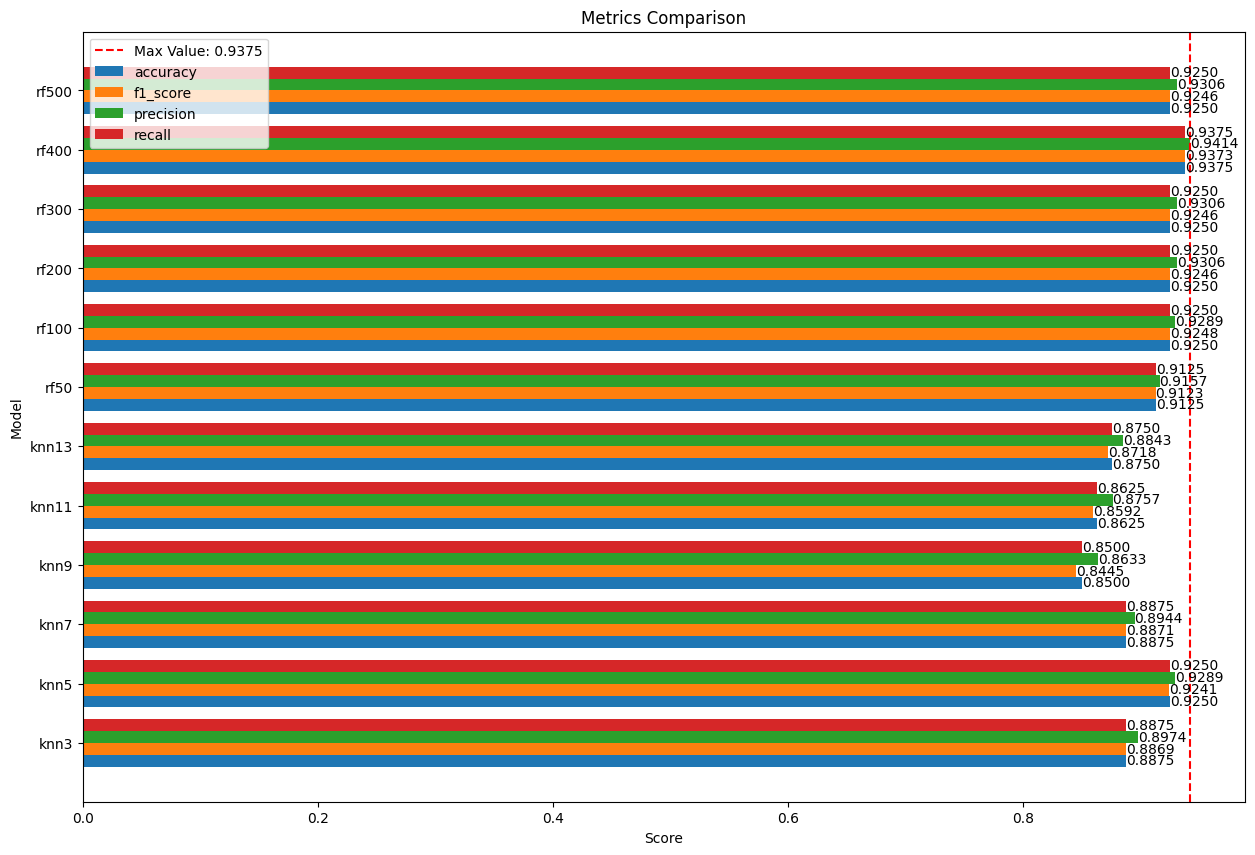

In [ ]:
models_container = ModelsContainer()
metrics = models_container.evaluate_all_models(gest_train_data, gest_train_lab, gest_val_data, gest_val_lab)
print("Metrics without normalization")
plot_metrics(metrics)

Metrics with normalization


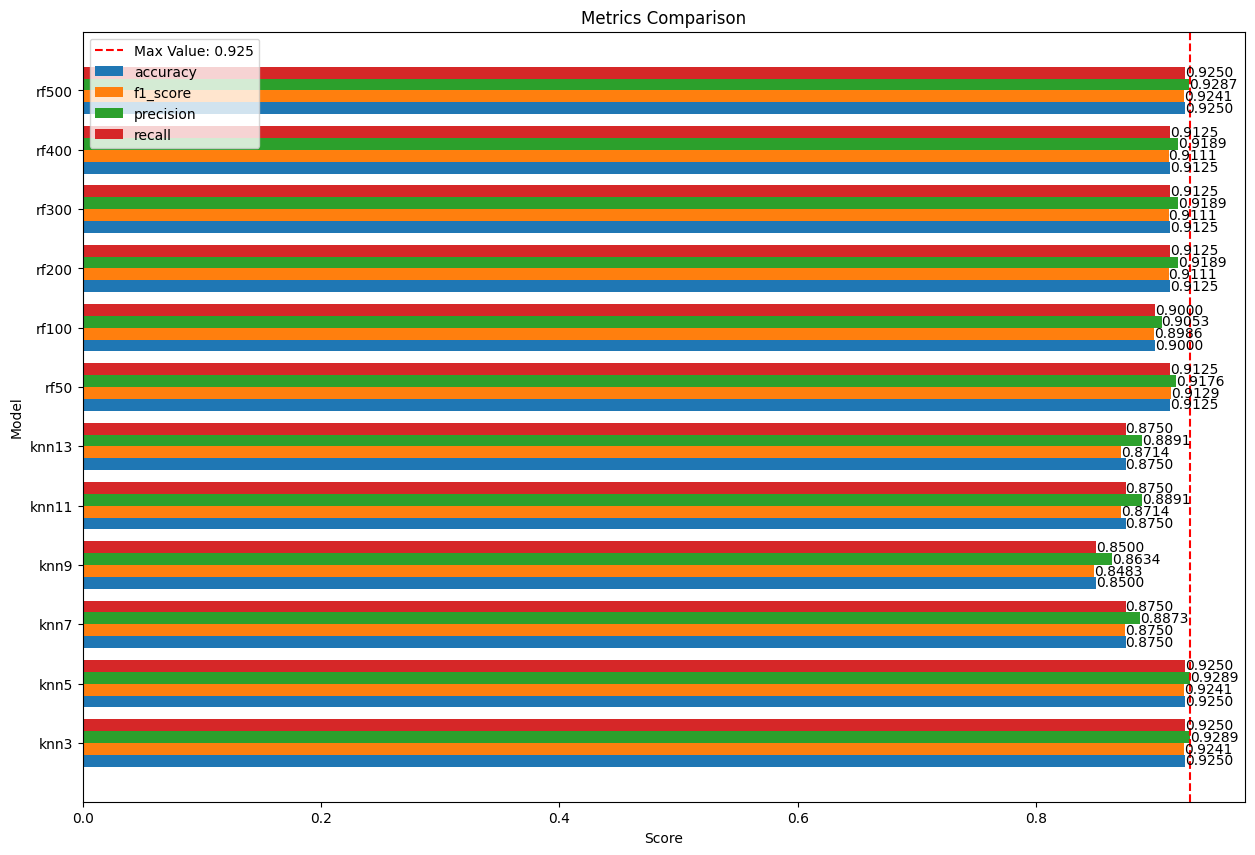

In [ ]:
models_container_nm = ModelsContainer()
metrics_nm = models_container_nm.evaluate_all_models(gest_train_dt_nm, gest_train_lab, gest_val_dt_nm, gest_val_lab)
print("Metrics with normalization")
plot_metrics(metrics_nm)

Metrics with sliding windows


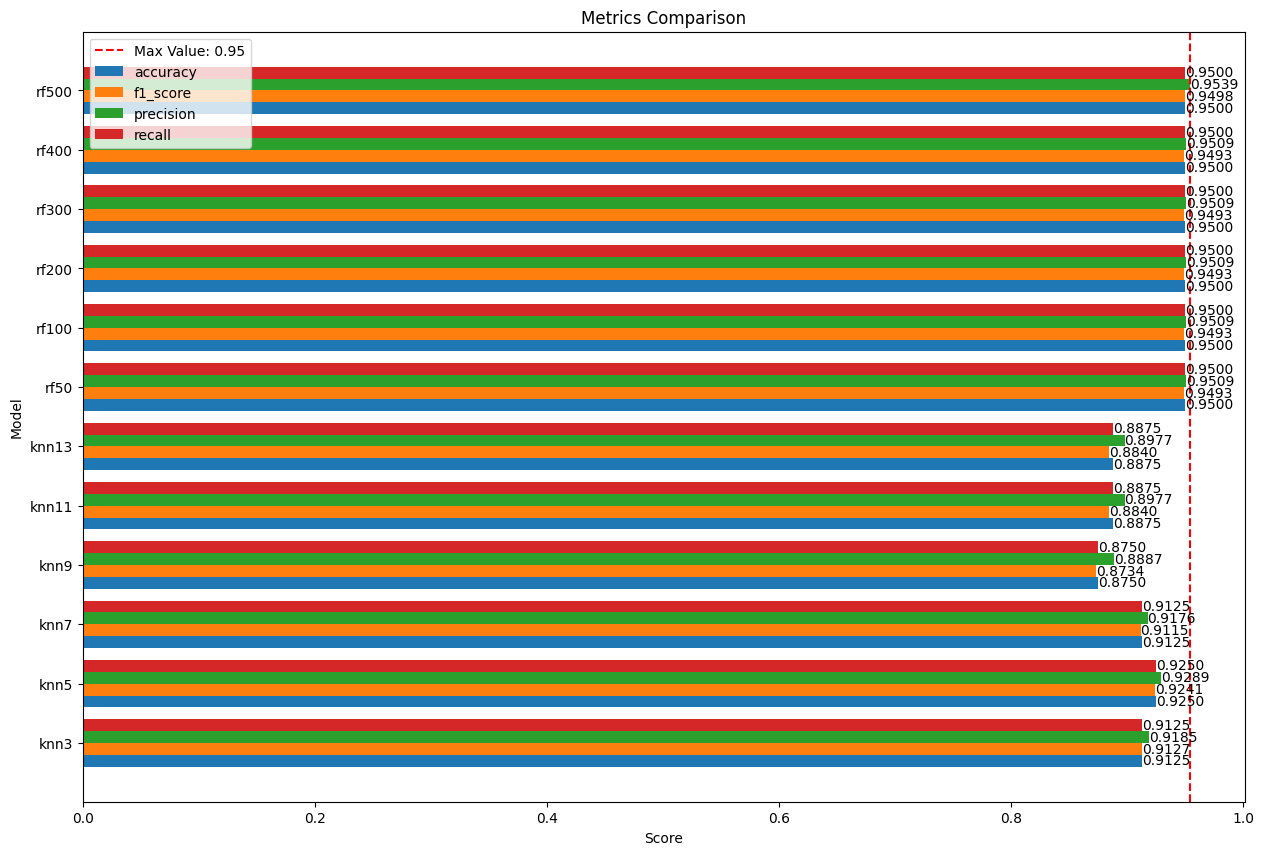

In [ ]:
models_container_windows = ModelsContainer()
metrics_windows = models_container_windows.evaluate_all_models(gest_train_window, gest_train_lab, gest_val_window, gest_val_lab)
print("Metrics with sliding windows")
plot_metrics(metrics_windows)

Metrics with sliding windows with normalization


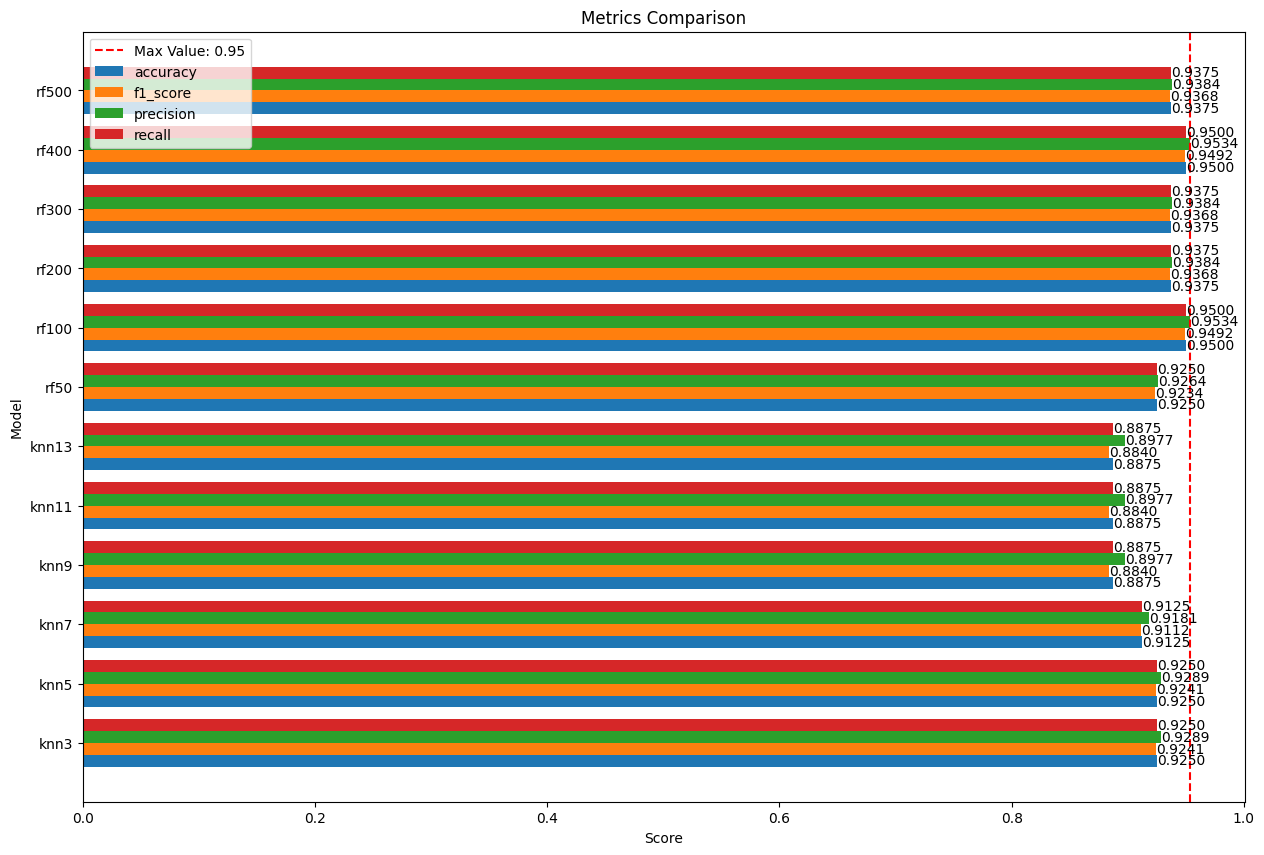

In [ ]:
models_container_windows_nm = ModelsContainer()
metrics_windows_nm = models_container_windows_nm.evaluate_all_models(gest_train_window_nm, gest_train_lab, gest_val_window_nm, gest_val_lab)
print("Metrics with sliding windows with normalization")
plot_metrics(metrics_windows_nm)

Metrics with seasonal


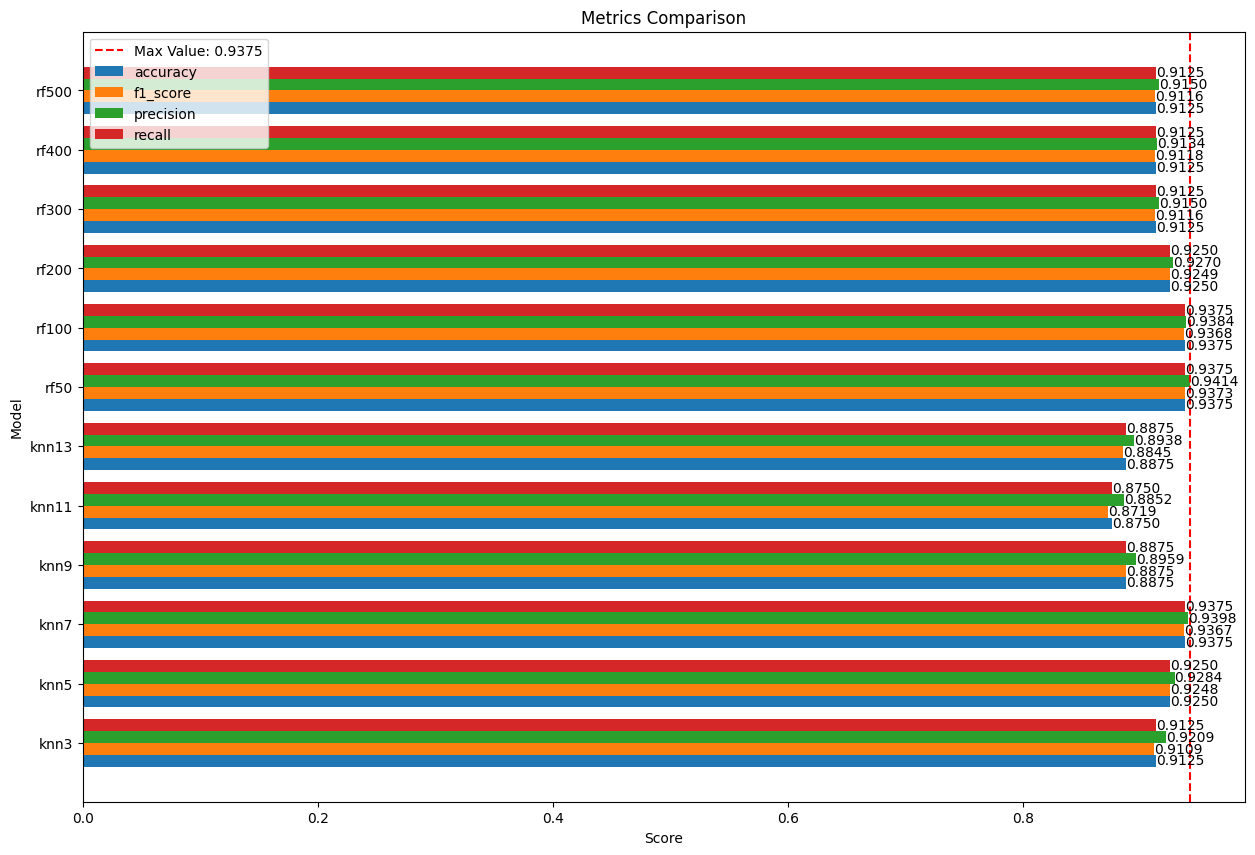

In [ ]:
models_container_seasonal = ModelsContainer()
metrics_seasonal = models_container_seasonal.evaluate_all_models(seasonal_train_data, seasonal_train_label, seasonal_val_data, seasonal_val_label)
print("Metrics with seasonal")
plot_metrics(metrics_seasonal)

Metrics with normalized seasonal


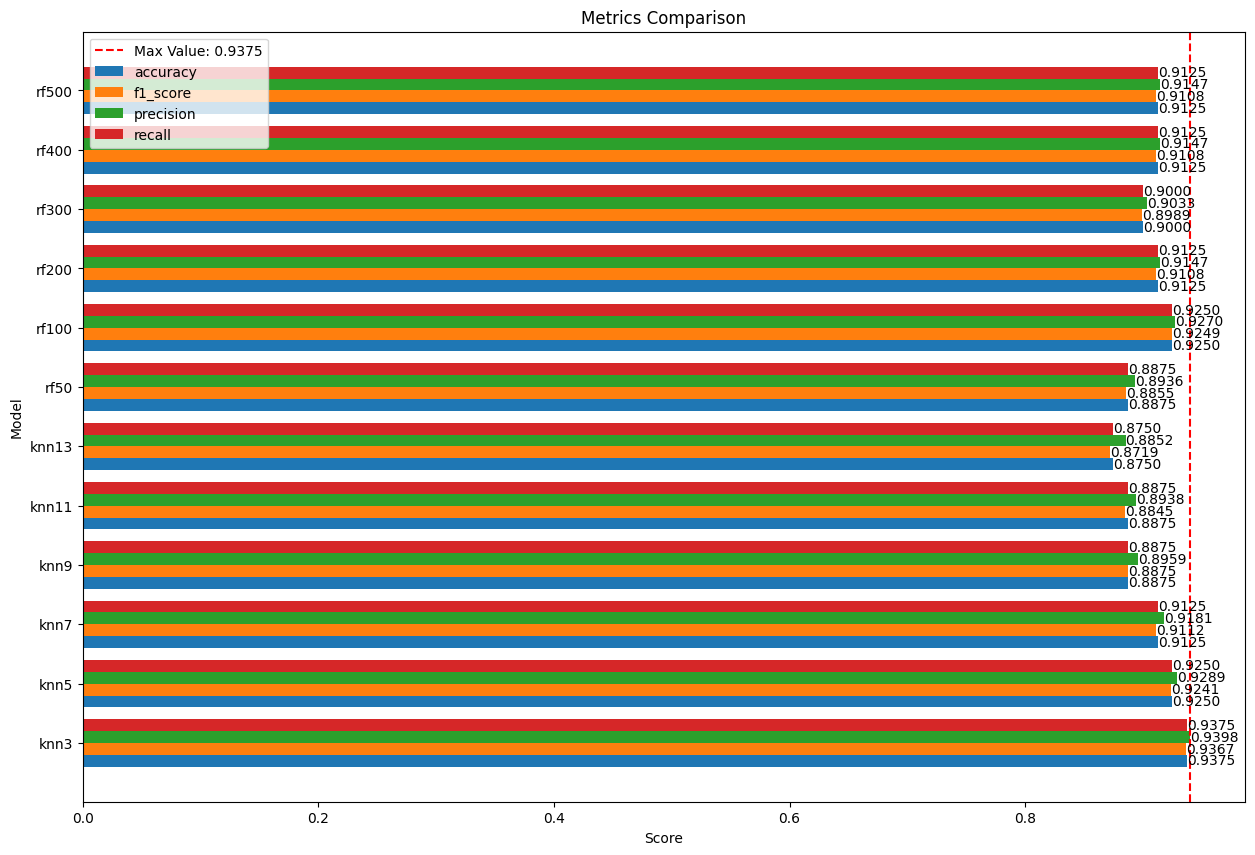

In [ ]:
models_container_nm_seasonal = ModelsContainer()
metrics_nm_seasonal = models_container_nm_seasonal.evaluate_all_models(seasonal_nm_train_data, seasonal_train_label, seasonal_nm_val_data, seasonal_val_label)
print("Metrics with normalized seasonal")
plot_metrics(metrics_nm_seasonal)

# Evaluating best models on test data

In [ ]:
def return_best_model(models, models_with_metrics):
  metrics_dict = dd(lambda: dd(float))
  for model_name, metrics in models_with_metrics.items():
              for metric_name, metric_value in metrics.items():
                  metrics_dict[metric_name][model_name] = metric_value
  del metrics_dict["confusion_matrix"]

  best_in_metric = {}
  for metric_name, metric_values in metrics_dict.items():
    best_model = max(reversed(list(metric_values)), key=metric_values.get)
    best_in_metric[metric_name] = best_model

  best_model = max(reversed(list(best_in_metric.values())), key=list(best_in_metric.values()).count)

  return best_model, models.models[best_model]

In [ ]:
def evaluate_model(model, X_test,  y_test):
        model_predictions = model.predict(X_test)
        metric_calculator = MetricCalculator(y_test, model_predictions)
        return metric_calculator.get_metrics()

In [ ]:
model_name, best_not_normalized_model = return_best_model(models_container, metrics)
results = evaluate_model(best_not_normalized_model, gest_test_data, gest_test_lab)
print("best not normalized model on test data")
print_metrics({model_name: results})

best not normalized model on test data
Model: rf400
accuracy: 0.85
f1_score: 0.8476559603262885
precision: 0.8497330182072829
recall: 0.85
confusion_matrix:
[[14  0  0  0  0  1  0  0]
 [ 0 14  0  0  0  0  0  1]
 [ 0  0 12  0  0  2  1  0]
 [ 0  0  1 12  1  0  0  1]
 [ 0  0  1  1 13  0  0  0]
 [ 1  0  0  0  3  9  0  2]
 [ 0  0  0  0  0  0 15  0]
 [ 0  1  0  1  0  0  0 13]]




In [ ]:
model_name_nm, best_normalized_model = return_best_model(models_container_nm, metrics_nm)
results = evaluate_model(best_normalized_model, gest_test_dt_nm, gest_test_lab)
print("best model on normalized test data")
print_metrics({model_name_nm : results})

best model on normalized test data
Model: rf500
accuracy: 0.875
f1_score: 0.8737521099930519
precision: 0.880049689410177
recall: 0.875
confusion_matrix:
[[14  0  0  0  0  1  0  0]
 [ 0 14  0  0  0  0  0  1]
 [ 0  0 12  0  0  2  1  0]
 [ 0  0  1 12  1  0  0  1]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  3 10  0  2]
 [ 0  0  0  0  0  0 15  0]
 [ 0  1  0  1  0  0  0 13]]




In [ ]:
model_name_window, best_model_sw = return_best_model(models_container_windows, metrics_windows)
results = evaluate_model(best_model_sw, gest_test_window, gest_test_lab)
print("best sliding window model on test data")
print_metrics({model_name_window : results})

best sliding window model on test data
Model: rf500
accuracy: 0.8833333333333333
f1_score: 0.881643558312079
precision: 0.8850198412698412
recall: 0.8833333333333333
confusion_matrix:
[[15  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  1]
 [ 0  0 13  0  0  2  0  0]
 [ 0  0  1 12  1  0  0  1]
 [ 0  0  0  1 14  0  0  0]
 [ 1  0  0  0  3 10  0  1]
 [ 0  0  0  0  0  0 15  0]
 [ 0  1  0  1  0  0  0 13]]




In [ ]:
model_name_window_nm, best_model_sw_nm = return_best_model(models_container_windows_nm, metrics_windows_nm)
results = evaluate_model(best_model_sw_nm, gest_test_window_nm, gest_test_lab)
print("best sliding window model \non normalized test data")
print_metrics({model_name_window_nm : results})

best sliding window model 
on normalized test data
Model: rf400
accuracy: 0.8833333333333333
f1_score: 0.8830637712537741
precision: 0.8850628232062054
recall: 0.8833333333333333
confusion_matrix:
[[15  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  1]
 [ 0  0 13  0  0  2  0  0]
 [ 0  0  1 12  1  0  0  1]
 [ 0  0  1  1 13  0  0  0]
 [ 0  0  0  0  3 11  0  1]
 [ 0  0  0  0  0  0 15  0]
 [ 0  1  0  1  0  0  0 13]]




In [ ]:
model_name_seasonal, best_seasonal_model = return_best_model(models_container_seasonal, metrics_seasonal)
results = evaluate_model(best_seasonal_model, seasonal_test_data, seasonal_test_label)
print("best seasonal decomposed model on test data")
print_metrics({model_name_seasonal : results})

best seasonal decomposed model on test data
Model: rf100
accuracy: 0.85
f1_score: 0.847080797079059
precision: 0.848091736694678
recall: 0.85
confusion_matrix:
[[15  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  1]
 [ 0  0 11  0  0  2  2  0]
 [ 0  0  1 13  0  0  0  1]
 [ 0  0  2  1 12  0  0  0]
 [ 1  0  0  1  2 10  0  1]
 [ 0  0  0  0  0  0 15  0]
 [ 0  1  0  1  1  0  0 12]]




In [ ]:
model_name_nm_seasonal, best_nm_seasonal_model = return_best_model(models_container_nm_seasonal, metrics_nm_seasonal)
results = evaluate_model(best_nm_seasonal_model, seasonal_nm_test_data, seasonal_test_label)
print("best seasonal decomposed model \non normalized test data")
print_metrics({model_name_nm_seasonal : results})

best seasonal decomposed model 
on normalized test data
Model: knn3
accuracy: 0.9166666666666666
f1_score: 0.9162372290406708
precision: 0.9216409412955465
recall: 0.9166666666666666
confusion_matrix:
[[14  0  0  0  0  0  1  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 13  0  0  2  0  0]
 [ 0  0  0 13  2  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  2  2 11  0  0]
 [ 0  0  0  0  0  0 15  0]
 [ 1  0  0  0  0  0  0 14]]


